## Introduction
***

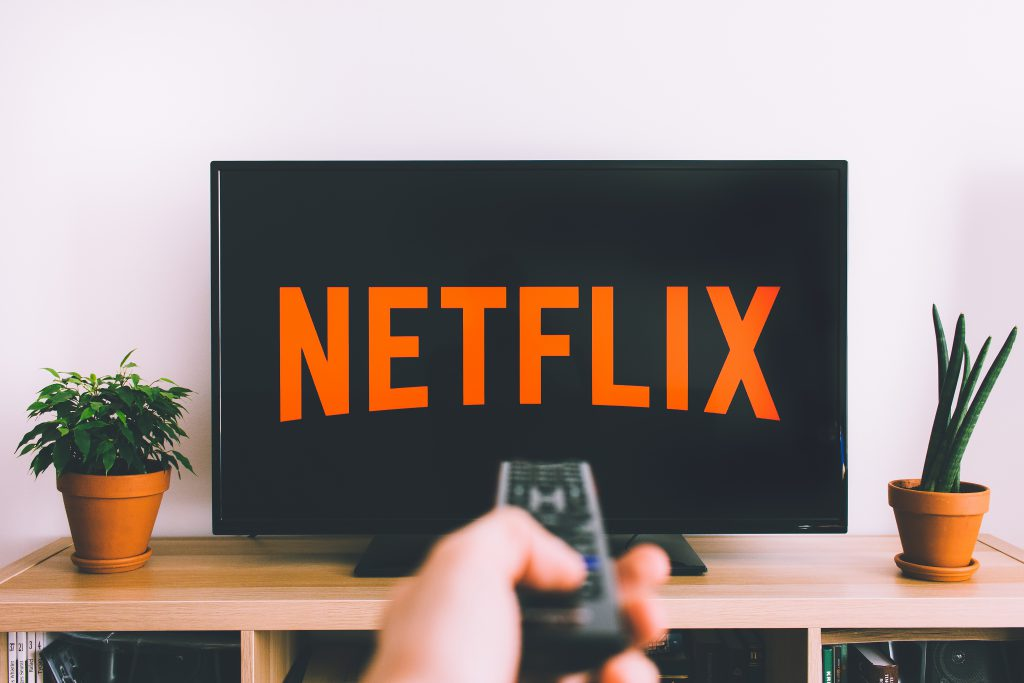

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, you will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.

After you complete your visualizations, you'll be creating a presentation to share the images with the rest of the Netflix Stock Profile team. Your slides should include:

- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Import Libraries

Let's get our notebook ready for visualizing! Import the libraries that you'll be using in this project:
- matplotlib
- pandas
- numpy
- seaborn

In [2]:
# importing required modules

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


### Inspect the Data

The data you will use for creating your visualizations come from the following datasets:

 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 

Let's load the datasets and inspect them.

While inspecting the variables, ask yourself questions about the data such as:

- Is the data represented by days, weeks, or months? 
- In which ways are the files different? 
- What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [3]:
# Generating dataframes from csv files and renaming Adj Close to Price
dji_data = pd.read_csv('DJI.csv').rename(columns={'Adj Close':'Price'})
nflx_data = pd.read_csv('NFLX.csv').rename(columns={'Adj Close':'Price'})




In [4]:
print(dji_data.head(),nflx_data.head())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

          Price      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000            Date        Open        High         Low       Close       Price  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997

## Rename Adj close

Notice how The first two column names are one word each, and the only one that is not is `Adj Close`!

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Change the name of the `Adj Close` column to `Price` all of the dataframes.

## Visualize Quarterly Data

Now its time to visualize the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. Accomplish this using a violin plot with four violins, one for each business quarter!

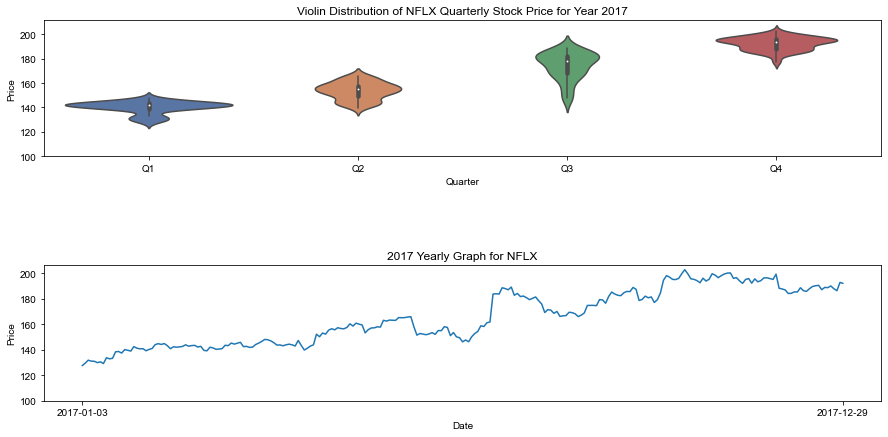

In [5]:
# Loading data in a df using pandas and renaming AdjClose to 'Price'
nflx_q_data = pd.read_csv('NFLX_daily_by_quarter.csv').rename(columns={'Adj Close':'Price'})

#Generating 2rows x 1column grid to draw 2 different plots
fig, axes = plt.subplots(2,1, figsize=(15,7))
sns.set_theme(style="whitegrid")

# Plot #1   Distribution of NFLX stock price during 2017 in a violinplot
v= sns.violinplot(x='Quarter',y='Price', data=nflx_q_data, ax=axes[0])
#Plot #2    Lineplot of NFLX stock price during 2017
l=sns.lineplot(x='Date',y='Price', data=nflx_q_data, ax=axes[1])

# setting plot #2 x_ticks corresponding to first and last 'Date' of inspected df and updating titles
start=nflx_q_data.Date[0]
end=nflx_q_data.Date[len(nflx_q_data) -1]
v.set_title('Violin Distribution of NFLX Quarterly Stock Price for Year 2017')
v.set_yticks(range(100,220, 20))
l.set_xticks([start,end])
l.set_yticks(range(100,220, 20))
l.set_title('2017 Yearly Graph for NFLX')
l.figure.subplots_adjust(hspace=0.8)
plt.savefig("plot1.png")
plt.show()
plt.close()


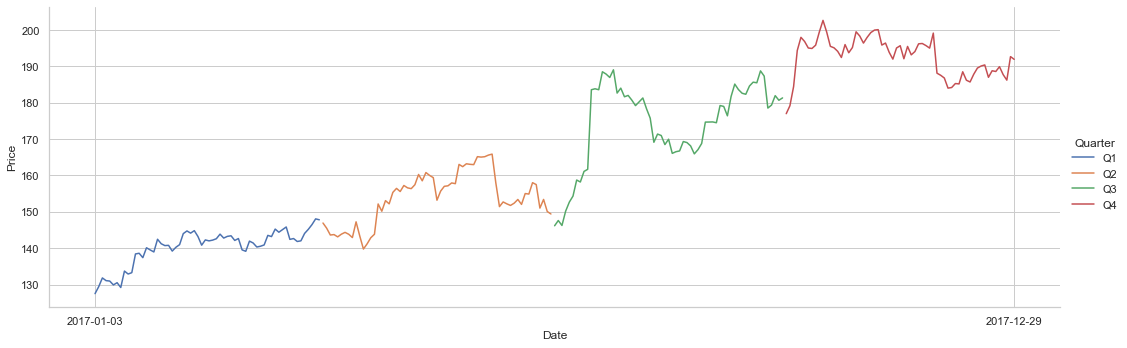

In [6]:
#Plot #3 showing stock price during same period with different hue for quarters

q = sns.relplot(x='Date', y='Price',data = nflx_q_data, kind='line', hue='Quarter', aspect=3)
q.set(xticks = [start,end])
plt.savefig("plot2.png")
plt.show()
plt.close()


- What are your first impressions looking at the visualized data?

- In what range(s) did most of the prices fall throughout the year?

- What were the highest and lowest prices? 

## Measure Performance of Earnings per Share

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter plot. 

Use the following lists to create the scatter plot:

In [7]:
# Set distinct values to seperate quarters 
x_positions = [1, 2, 3, 4]

# Label each of the quarters
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]

# Actual earnings per share
earnings_actual =[.4, .15, .29, .41]

# Estimated projected earnings per share
earnings_estimate = [.37, .15, .32, .41]

# Creating a df containing all data contained inside above lists
earnings = {'x': x_positions, 'Quarter': chart_labels, 'Actual':earnings_actual, 'Estimated':earnings_estimate}
earnings_df =pd.DataFrame(data=earnings)
print(earnings_df)

# Melting df to include earning type as variable
earnings_df = pd.melt(earnings_df, id_vars=['x','Quarter'], value_vars=['Actual','Estimated'], value_name='Earning', var_name='EarningType')
print(earnings_df)

   x Quarter  Actual  Estimated
0  1  1Q2017    0.40       0.37
1  2  2Q2017    0.15       0.15
2  3  3Q2017    0.29       0.32
3  4  4Q2017    0.41       0.41
   x Quarter EarningType  Earning
0  1  1Q2017      Actual     0.40
1  2  2Q2017      Actual     0.15
2  3  3Q2017      Actual     0.29
3  4  4Q2017      Actual     0.41
4  1  1Q2017   Estimated     0.37
5  2  2Q2017   Estimated     0.15
6  3  3Q2017   Estimated     0.32
7  4  4Q2017   Estimated     0.41


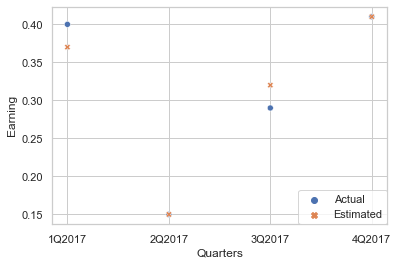

In [8]:
#Setting same theme as previous plots and drawing scatterplot of Actual vs Estimated Earnings
sns.set_theme(style="whitegrid")
e = sns.scatterplot(x='x', y='Earning',data = earnings_df, hue='EarningType',style='EarningType')
# Plot Title
#plt.title('Actual VS Estimated Quarterly Earnings for NFLX - YEAR 2017', size = 15)
#Modify x ticks to  1 , 2 , 3 , 4
e.set_xticks(x_positions)
# x ticks labels:   'Q1''Q2''Q3''Q4'
e.set_xticklabels(chart_labels)
# Plot Label
plt.xlabel('Quarters')
plt.legend(loc='lower right', borderaxespad=0)
plt.savefig("plot3.png", dpi=100)
plt.show()
plt.close()

## Visualize Earnings and Revenue Side by Side

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. We have visualized a similar chart in the second Matplotlib lesson [Exercise 4](https://www.codecademy.com/courses/learn-matplotlib/lessons/matplotlib-ii/exercises/side-by-side-bars).

   x  revenues  earnings quarters
0  1      2.79   0.06560   2Q2017
1  2      2.98   0.12959   3Q2017
2  3      3.29   0.18552   4Q2017
3  4      3.70   0.29012   1Q2018
   x quarters      type   amount
0  1   2Q2017  revenues  2.79000
4  1   2Q2017  earnings  0.06560
1  2   3Q2017  revenues  2.98000
5  2   3Q2017  earnings  0.12959
2  3   4Q2017  revenues  3.29000
6  3   4Q2017  earnings  0.18552
3  4   1Q2018  revenues  3.70000
7  4   1Q2018  earnings  0.29012


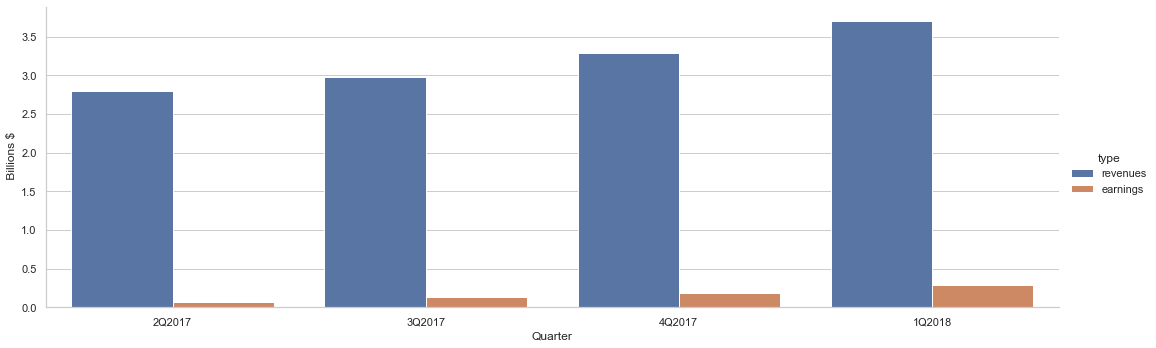

In [9]:
# Reported values from Netflix
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
 
# Quarter labels list
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

data = {'x':x_positions,'revenues':revenue_by_quarter, 'earnings':earnings_by_quarter, 'quarters':quarter_labels}
df1= pd.DataFrame(data)

print(df1)
df = pd.melt(df1, id_vars=['x','quarters'], value_vars=['revenues','earnings'], value_name='amount', var_name='type').sort_values('x')

print(df)

q=sns.catplot(data=df, x='x', y='amount', hue='type', kind='bar', aspect=3)
#plt.title('Revenues VS Earnings Quarterly Data Q2/Q3/Q4 2017 + Q1 2018', size =15)
q.set_xlabels('Quarter')
q.set_ylabels(' Billions $')
q.set_xticklabels(quarter_labels)
plt.savefig("plot4.png", dpi=100)
plt.show()
plt.close()


What are your first impressions looking at the visualized data?

- Does Revenue follow a trend?
- Do Earnings follow a trend?
- Roughly, what percentage of the revenue constitutes earnings?

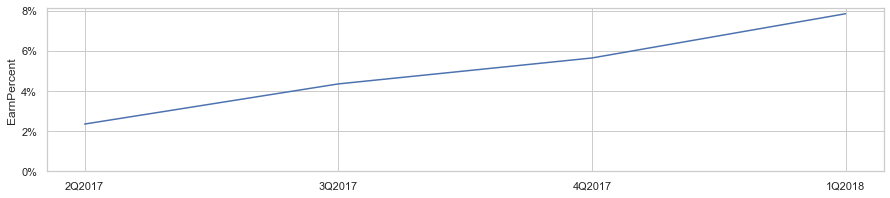

In [10]:
# Generating new column in original df containing Earning percentual for each Q
df1['EarnPercent'] = (df1.earnings/df1.revenues)*100

#Plotting percent values
fig, axes = plt.subplots(figsize=(15,3))
l = sns.lineplot(data=df1, x=x_positions, y='EarnPercent')
# Title, ticks and lables
#plt.title('Quarterly Revenues Earning Percetual')

l.set_xticks(x_positions)
l.set_yticks(range(0,10,2))
l.set_yticklabels(['{}%'.format(i) for i in range(0,10,2)])
l.set_xticklabels(quarter_labels)
plt.savefig("plot5.png")
plt.show()
plt.close()

   x  revenues  earnings quarters  EarnPercent  QTQ
0  1      2.79   0.06560   2Q2017     2.351254    0
1  2      2.98   0.12959   3Q2017     4.348658   84
2  3      3.29   0.18552   4Q2017     5.638906   29
3  4      3.70   0.29012   1Q2018     7.841081   39


/var/folders/p4/rwxltnfs6qvgnnqwbq64_g4m0000gn/T/ipykernel_6877/2583835890.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['QTQ'][i] = calculate_QTQ(df1.EarnPercent[i],df1.EarnPercent[i-1])


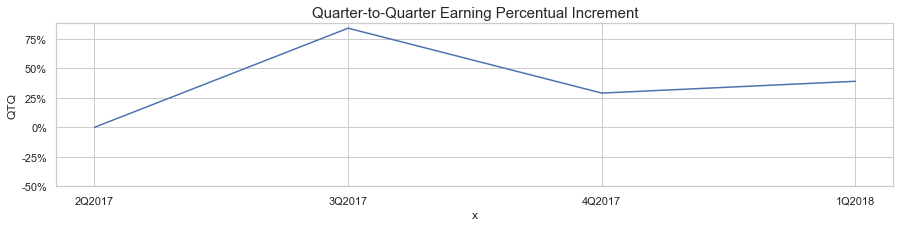

In [11]:
# Will plot earning percent QTQ increase

# Define function that accept a 2 values and return increment between new and old, we will provide the late year 
# between the two comparing first 

def calculate_QTQ(new, old):
    increment = ((new-old)/old)*100
    return increment

# Generating df column with year over year increment
df1['QTQ'] = 0
for i in range(1,4):
    df1['QTQ'][i] = calculate_QTQ(df1.EarnPercent[i],df1.EarnPercent[i-1])


print(df1)
fig, axes = plt.subplots(figsize=(15,3))
y = sns.lineplot(data = df1, x='x', y='QTQ')
plt.title('Quarter-to-Quarter Earning Percentual Increment', size = 15)
y.set_xticks(x_positions)
y.set_xticklabels(quarter_labels)
y.set_yticks(range(-50,100,25))
y.set_yticklabels(['{}%'.format(i) for i in range(-50,100,25)])
y.set_xticklabels(quarter_labels)
plt.savefig("plot6.png")
plt.show()
plt.close()

## Comparing to the Dow Jones Industrial Average


In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 

Consider the following questions when analyzing the plots:

- How did Netflix perform relative to Dow Jones Industrial Average in 2017?
- Which was more volatile?
- How do the prices of the stocks compare?

## Challenge

Congratulations

Your seaborn visualization skills added great value to the team! The team found so much insight from the work, they asked you to present your findings to the board. The extra task of creating a presentation can be considered as a challenge which does not need to be completed to move on to the next section.

It's time to make your presentation! Save each of your visualizations as a png file with `plt.savefig("filename.png")`.

As you prepare your slides, think about the answers to the graph literacy questions. Embed your observations in the narrative of your slideshow!

Remember that your slideshow must include:
- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017



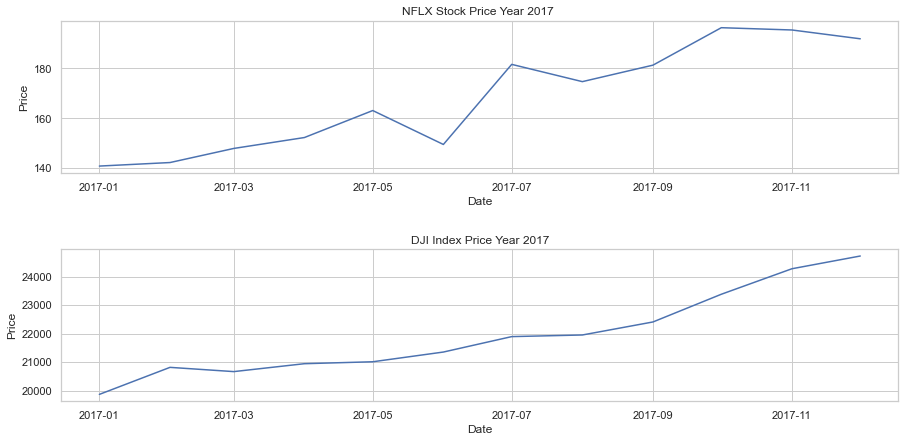

/var/folders/p4/rwxltnfs6qvgnnqwbq64_g4m0000gn/T/ipykernel_6877/254244164.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dji_data['MTM'][i] = calculate_QTQ(dji_data.Price[i],dji_data.Price[i-1])
/Users/matteoamanti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/p4/rwxltnfs6qvgnnqwbq64_g4m0000gn/T/ipykernel_6877/254244164.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

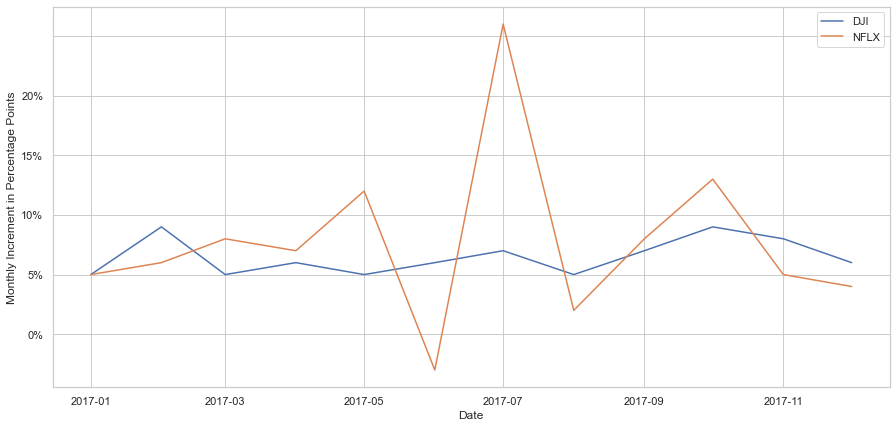

In [19]:
#Generating 2rows x 1column grid to draw 2 different plots
fig, axes = plt.subplots(2,1, figsize=(15,7))
sns.set_theme(style="whitegrid")

# Plot #1   NFLX stock price during 2017 
l1 = sns.lineplot(x='Date',y='Price', data=nflx_data, ax=axes[0])
l1.set(title='NFLX Stock Price Year 2017 ')
#Plot #2    Lineplot of DJI Index price during 2017
l2 = sns.lineplot(x='Date',y='Price', data=dji_data, ax=axes[1])
l2.set(title='DJI Index Price Year 2017')
l2.figure.subplots_adjust(hspace=0.5)
# setting plot #2 x_ticks corresponding to first and last 'Date' of inspected df and updating titles
dji_data["Date"] = pd.to_datetime(dji_data["Date"])
nflx_data["Date"] = pd.to_datetime(nflx_data["Date"])



plt.savefig("plot7.png")
plt.show()
plt.close()


dji_data['MTM'] = 0
nflx_data['MTM'] = 0

fig, axes = plt.subplots(figsize=(15,7))

for i in range(1,len(dji_data)):
    dji_data['MTM'][i] = calculate_QTQ(dji_data.Price[i],dji_data.Price[i-1])

x1= dji_data.Date
y1 = dji_data.MTM

s1= sns.lineplot(x1,y1, data=dji_data, label='DJI')

for i in range(1,len(nflx_data)):
    
    nflx_data['MTM'][i] = calculate_QTQ(nflx_data.Price[i],nflx_data.Price[i-1])

x2= nflx_data.Date
y2 = nflx_data.MTM
s2= sns.lineplot(x2,y2, data=nflx_data, label='NFLX')
s1, s2.set_yticklabels(['{}%'.format(i) for i in range(-5,25,5)])

#plt.title('NFLX vs DJI Monthly Increment for Year 2017')
plt.ylabel('Monthly Increment in Percentage Points')
s1, s2.legend()
plt.savefig("plot8.png")
plt.show()
plt.close()